# <div align="center">  MACS207b - Disruption problem </div>

### Homework of Inès ENNIGROU - Kriss GUTIERREZ ANCO - Marion HUBLER

The aim of this labwork is to study the behaviour of a point process $N$ whose distribution is given by the following rule : initially events occur according to a Poisson process of intensity $\lambda_0$ until time $\tau$ when it then switch to another Poisson process but with intensity $\lambda_1$

Our objective is to approximate $\tau$, given the observation of one single trajectory $N$, under the assumption that $\tau$ follows an exponential distribution of parameter $\sigma$

To do so, we will try and approximate the function $Z(t) = \mathbb{1}_{(\tau < t)}$ by the following estimator $\hat{Z}(t) = \mathbb{E}[Z(t) | \mathcal{F}_t^N] = \mathbb{P}(\tau < t| \mathcal{F}_t^N)$ which we will use under the expression : 

$$ \hat{Z}(t) =\int_{0}^{t} h(s)(1 - \widehat{Z}(s)) \, ds + \int_{0}^{t} \frac{(\lambda_1 - \lambda_0) \widehat{Z}(s^-)(1 - \widehat{Z}(s^-))} {\hat{\lambda}(s)} (dN(s) - \hat{\lambda}(s)ds) $$

---

# Question 1

### Analysis of the formula :

By analyzing the given formula, we can see that the first part : $\int_{0}^{t} h(s)(1 - \widehat{Z}(s)) \, ds$ represents the continuous component of $\hat{Z}$ while the second part: $\int_{0}^{t} \frac{(\lambda_1 - \lambda_0) \widehat{Z}(s^-)(1 - \widehat{Z}(s^-))} {\hat{\lambda}(s)} (dN(s) - \hat{\lambda}(s) \, ds)$ represent the discontinuous jumps that $\hat{Z}$ experiences when the jumps of $N$ occur since  $dN(s)-\hat{\lambda}(s) \, ds$ represents the difference between what is observed and the expected value (based on the intensity $\lambda$). 

### Rewriting the formula :

- Firstly, since $\hat{Z}$ is left-continuous ($Z(t) = \mathbb{1}_{(\tau<t)}$) we can say that : $\hat{Z}(s^-) = \hat{Z}(s) \Rightarrow \Delta Z(s) = 0 $ and rewrite : 
$$\int_{0}^{t} (\lambda_1 - \lambda_0)\hat{Z}(s^-)(1-\hat{Z}(s^-)) \, ds = \int_{0}^{t} (\lambda_1 - \lambda_0)\hat{Z}(s)(1-\hat{Z}(s)) \, ds $$


- Secondly, we have by definition that : $$ \int_{0}^{t} \frac{(\lambda_1 - \lambda_0)\hat{Z}(s^-)(1-\hat{Z}(s^-))}{\lambda_0 - (\lambda_1 - \lambda_0)\hat{Z}(s^-)}dN(s)  = \sum_{T_k \le t}^{} \frac{(\lambda_1 - \lambda_0)\hat{Z}(T_k^-)(1-\hat{Z}(T_k^-))}{\lambda_0 - (\lambda_1 - \lambda_0)\hat{Z}(T_k^-)} $$

### Final formula : 

$$\hat{Z}(t) = \int_{0}^{t} (h(s)-(\lambda_1 - \lambda_0)\hat{Z}(s)) (1 - \hat{Z}(s)) \, ds +  \sum_{T_k \le t}^{} \frac{(\lambda_1 - \lambda_0)\hat{Z}(T_k^-)(1-\hat{Z}(T_k^-))}{\lambda_0 - (\lambda_1 - \lambda_0)\hat{Z}(T_k^-)} $$

### Dynamics between the jump $\hat{Z}$ : 

We have that between the jumps, the dynamic of $\hat{Z}$ is given by : $\hat{Z}(t) = \hat{Z}(T_{n-1}) + \int_{T_{n-1}}^{t} (h(s)- (\lambda_1-\lambda_0)\hat{Z}(s)) (1 - \hat{Z}(s)) \, ds$ because the sum is equal to 0 since there are no new jumps between times $T_{n-1}$ and $t$. 

So we have that between jumps $\hat{Z}$ is continuous and differentiable, with differential expression : $ \frac {d \hat{Z}(t)}{dt} = (h(t) - (\lambda_1 - \lambda_0)\hat{Z}(t)) (1-\hat{Z}(t))$ 

We can see that we have a differential equation of first order (non linear because $\hat{Z}(t)^2$ appears) with respect to $\hat{Z}$. We expect the solution to behave like some kind of exponential.

### Size of the jumps of $\hat{Z}$ : 

By looking at the formula, we obtain that the size of the jumps between $T_n^-$ and $T_n$ is given by: $\frac{(\lambda_1 - \lambda_0) \hat{Z}(s-)(1 - \hat{Z}(s-))} {\hat{\lambda}(s)}$

---

# Question 2 :

### Sample-path of N

Firstly, we will simulate one sample path $N$. 

To do so, we need to first, simulate  $\tau \sim \mathcal{Exp}(\sigma)$, and then to simulate the inter-arrival times following an exponential distribution of parameter $\lambda_0$. Once the sum of these arrival times exceeds $\tau$ , we switch to the distribution whose intensity is $\lambda_1$

In [589]:
import numpy as np
import matplotlib.pyplot as plt

Since every distribution we will sample is an exponential one, we start by writing a function that samples points following this distribution, using a simple inverse probability sampling method, since de CDF function is known and easily invertible

In [14]:
def Exponential(sigma):
    """Simulate an exponential distribution
       of parameter sigma
    """
    
    F_inv = lambda u : - np.log(1-u) / sigma
    u = np.random.random_sample()
    x = F_inv(u)
    return x

Now, let's define a function that simulates the trajectory 

In [93]:
def trajectory_N(lambda0, lambda1, sigma, T):
    """Simulate the trajectory of N

    Parameters
    ----------
    lambda0 : float
              The intensity before tau
    lambda1 : float
              The intensity after tau
    sigma   : float
              The parameter of the distribution of tau
    T       : float
              The size of the interval 

    Returns
    -------
    tau : float
          The value of tau
    N_0 : list
          The arrival times before tau
    N_1 : list
          The arrival times after tau
          (empty if tau > T)
    N   : list
          Complete sample paths
    
    """
    
    # Initialization
    t, N0, N1 = 0, [0], []
    
    # Generate tau using its distribution parameter sigma
    tau = Exponential(sigma)
    
    # Simulate the first part of the trajectory N0
    while t<= min(tau,T) :
        xi = Exponential(lambda0)
        t = t + xi
        N0.append(t)
        
    # Simulate the second part of the trajectory N1
    while t <= T :
        xi = Exponential(lambda1)
        t = t + xi
        N1.append(t)
    
    # Concatenate the paths 
    N = N0 + N1
    
    return tau, N0, N1, N

Note that for our observation to be usable, we will need to choose "good" values of $T,\lambda_0, \lambda_1$ and $\sigma$. Fistly, we want for $\tau$ to be less than $T$ on most instances of the sample path, to do so we have to fix a $T$ and select $\sigma$ accordingly. Knowing that $\tau \sim \mathcal{E}xp(\sigma)$, it has expected value $\frac{1}{\sigma}$ which means choosing for instance $\frac{1}{\sigma} = \frac{T}{2}$ ensures that, on average, half the sample path will follow the distribution of intensity $\lambda_0$ and the other half $\lambda_1$. Finally, we must choose $\lambda_0$ and $\lambda_1$ itensities high enough for the jumps to happen sufficiently often to have a good path, but not to small so that we can still "see" the jumps.

In [587]:
lambda0 = 1
lambda1 = 5
T = 20
sigma = 2/T

Now let's plot one instance

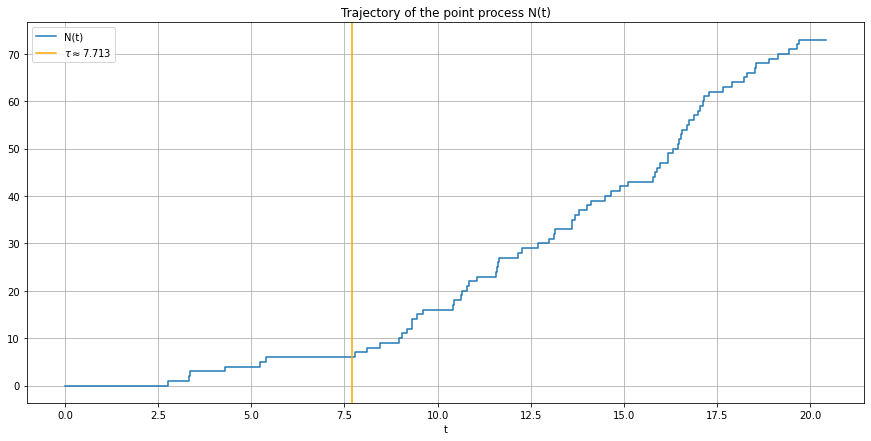

In [588]:
np.random.seed(8092005)
tau, N0, N1, N = trajectory_N(lambda0, lambda1, sigma, T)

pointprocess = [0] + list(range(len(N)-1))

plt.figure(figsize = (15,7))
plt.step(N, pointprocess, label = 'N(t)')
plt.title("Trajectory of the point process N(t)")
if tau <= T :
    plt.axvline(x=tau, color = 'orange', label = r'$\tau \approx $' + str(tau)[:5])
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()

### Trajectory of $\hat{Z}$

We will re-use the previously stated formulas in Question 1: 

- Between the jumps, the dynamic is given by :
$$\\ \frac {d \widehat{Z}(t)}{dt} = (h(t) - (\lambda_1 - \lambda_0)\widehat{Z}(t)) (1-\widehat{Z}(t)) $$
With $h(t) = \sigma . \mathbb{1}_{t \geq 0}$


- While the jumps' values are given by : 
$$ \hat{Z}(T_n) = \hat{Z}(T_n^{-}) + \frac{(\lambda_1 - \lambda_0) \widehat{Z}(T_n^{—})(1 - \widehat{Z}(T_n^{—}))} {\lambda_0 + (\lambda_1 - \lambda_0)\widehat{Z}(T_n^{-})}$$

In [436]:
def Euler(f, y0, t):
    """Implements the Euler's algorithm method for ODE resolution
    
    Parameters
    ----------
    f  : function
         The function such that : y' = f(y,t)
    y0 : float
         The initial condition
    t  : list
         The time intervall on which we resolve
    """
    
    n = len(t)
    y = [y0]
    for i in range(n - 1):
        value = y[i] + (t[i+1] - t[i]) * f(y[i], t[i])
        y.append(value)
    return y


def trajectory_Z_hat(lambda0, lambda1, sigma, T, N, nb_points = 100):
    """ Computes a numerical approximation of Z_hat(t)
    using the formulas above 
    
    Parameters
    ----------
    lambda0 : float
              The intensity before tau, ASSUMED to be known
    lambda1 : float
              The intensity after tau, ASSUMED to be known
    sigma   : float
              The parameter of the distribution of tau, ASSUMED to be known since we need must use h
    T       : float
              The size of the interval, ASSUMED to be known since we observe N
    N       : list
              The observed time jumps of the point process 
              
    """
    
    Z_hat = [0] # by definiton of Z, otherwise it would mean tau <= 0
    t = []
    f = lambda y, t : (sigma - (lambda1 - lambda0) * y) * (1-y)
    
    
    for k in range(len(N)-1):
        sample_t = np.linspace(N[k], N[k+1], nb_points)[:-1]
        t += list(sample_t)

        Z_euler = Euler(f, Z_hat[-1], sample_t)
        Z_hat += list(Z_euler)
        
        Z_jump = Z_hat[-1] + ((lambda1 - lambda0)*Z_hat[-1]*(1-Z_hat[-1])) / (lambda0 + (lambda1 - lambda0)*Z_hat[-1])
        Z_hat.append(Z_jump)
        
        t.append(N[k+1])
        
    return t, Z_hat[1:]

Now let's plot !

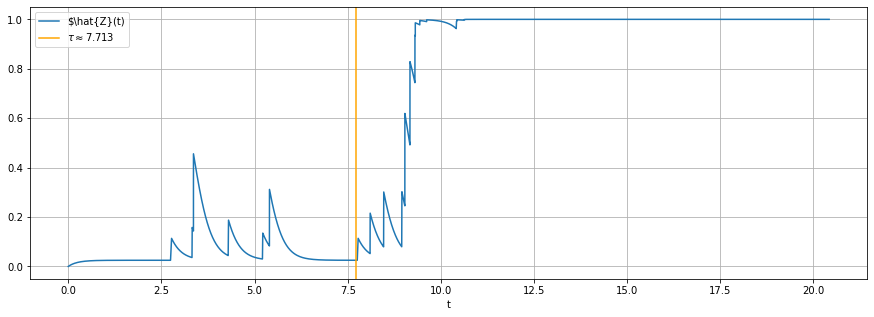

In [457]:
t, Z_hat = trajectory_Z_hat(lambda0, lambda1, sigma, T, N)

plt.figure(figsize = (15, 5))
plt.plot(t, Z_hat, label = r"$\hat{Z}(t)")
if tau <= T :
    plt.axvline(x=tau, color = 'orange', label = r'$\tau \approx $' + str(tau)[:5])
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()

### Comments :
As expected, we can see that the curve is a succession of little portions of exponentials followed by jumps (when $N$ jumps) and so on ... 
Also, we can notice on this instance (and on all the other instances we have tried, with different parameters) that $\tau$ has the tendency to occur slightly before the big jump. 
Therefore, a good approximation of $\tau$, has to take this fact into account.

---

# Question 3 :

### Ideas

Now let's assume, $\hat{Z}(t)$ is the true observation, that is  $\hat{Z}(t) = \mathbb{P}(\tau < t | \mathcal{F}_t^N)$
In order to approximate $\tau$ using this curve, several methods and their respective criterions can be used :
- 1. By finding the first time at which $\hat{Z}(t)$ crosses a certain, chosen threshold $\eta$ : this threshold should be chosen according to the accuracy we want for $\tau$ that is : choose it such that we have : $\mathbb{P}(\tau < t | \mathcal{F}_t^N) \ge \eta $
- 2. Another idea, is to do the same thing, but starting from parsing through the t-axis from right to left, in order to avoid detecting the sometimes important yet not meaningful variations before $\tau$
- 3. Also, we could only look at the jumps of $\hat{Z}(t)$ (which are those of $N$) and estimate $\tau$ as the argmax $T^-$ of these jumps
- 4. Finally, we could compute the approximated derivative of $\hat{Z}(t)$ (since it's not  differentiable) and then choose $\tau$ as the argmax of this function. 

To go further, it could be argued that filtering the high frequencies of the curve to smoothen the curve could firstly allow for methods 1. and 2. to output the same value, but also to allow for the derivative method 4. to be better, because the curve would then be differentiable.

### Implementation

#### Let's start with method 1./2.

In [490]:
def Method_1_2(Z_hat, t, eta = 0.5):
    n = len(t)
    tau = 0
    for i in range(n-1):
        if Z_hat[i] <= eta and Z_hat[i+1] >= eta:
            return t[i]
        
tau1, tau2 = Method_1_2(Z_hat, t, 0.5), Method_1_2(Z_hat[::-1], t[::-1], 0.5)
print("Method 1 with eta = 0.5 : ", tau1)
print("Method 2 with eta = 0.5 : ", tau2)

Method 1 with eta = 0.5 :  9.03352845562289
Method 2 with eta = 0.5 :  9.161809832774146


We can see that the obtained values are close to the one expected of $\tau$. We can say that the threshold chosen is rather arbitrary and other thresholds would give us different values.

In [459]:
print('Method 1 with eta = 0.3 :', str(Method_1_2(Z_hat, t, 0.3))[:4])
print('Method 1 with eta = 0.5 :', str(Method_1_2(Z_hat, t, 0.5))[:4])
print('Method 1 with eta = 0.9 :', str(Method_1_2(Z_hat, t, 0.9))[:4])

Method 1 with eta = 0.3: 3.36
Method 1 with eta = 0.5: 9.03
Method 1 with eta = 0.9: 9.30


#### Now let's try method 4.

Method 4 :  3.3605792976887554


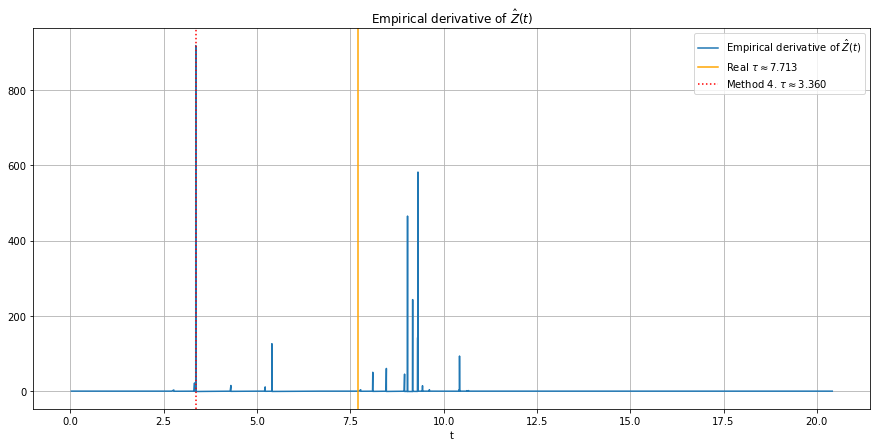

In [513]:
def Method_4(Z_hat, t):
    n = len(t)
    retour = []
    maxi, argmaxi = 0, 0
    for i in range(1,n-1):
        value = round((Z_hat[i+1]-Z_hat[i-1])/(t[i+1]-t[i-1]), 2) 
        retour.append(value)
    for i in range(len(retour)):
        if retour[i] > maxi :
            maxi = retour[i]
            argmaxi = times[i]
    return argmaxi, retour, t[1:-1]

tau4, retour, times = Method_4(Z_hat, t)
print("Method 4 : ", tau4)

plt.figure(figsize = (15,7))
plt.plot(times, retour, label = r'Empirical derivative of $\hat{Z}(t)$')
plt.axvline(x=tau, color = 'orange', label = r'Real $\tau \approx $' + str(tau)[:5])
plt.axvline(x=tau4, color = 'red', label = r'Method 4. $\tau \approx $' + str(tau4)[:5], ls = ':')
plt.xlabel('t')
plt.legend()
plt.title(r'Empirical derivative of $\hat{Z}(t)$')
plt.grid()
plt.show()

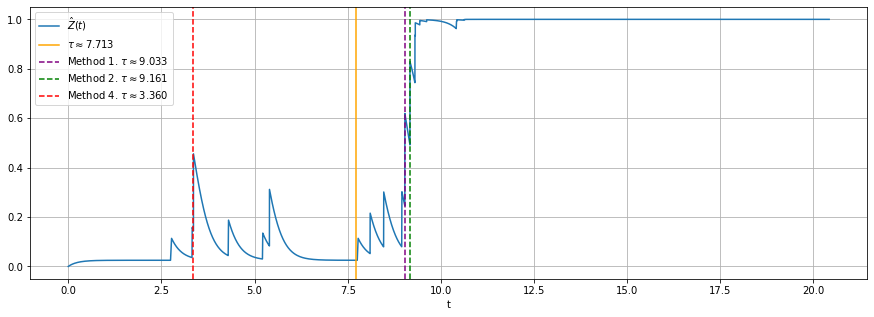

In [590]:
## Plotting all different approximations

plt.figure(figsize = (15, 5))
plt.plot(t, Z_hat, label = r"$\hat{Z}(t)$")
if tau <= T :
    plt.axvline(x=tau, color = 'orange', label = r'$\tau \approx $' + str(tau)[:5])
plt.axvline(x=tau1, color = 'purple', label = r'Method 1. $\tau \approx $' + str(tau1)[:5], ls = '--')
plt.axvline(x=tau2, color = 'green', label = r'Method 2. $\tau \approx $' + str(tau2)[:5], ls = '--')
plt.axvline(x=tau4, color = 'red', label = r'Method 4. $\tau \approx $' + str(tau4)[:5], ls = '--')
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()

### Comments :
- Methods 1 and 2 tend to have close results between each other, however, the result is still far from the actual $\tau$ for the reasons mentionned before : $\tau$ tends to occur slightly before the jump.
- On the other hand, Method 4 detects the jump whose slope is the steepest, and so, not necessarily the moment of the jump. 
To avoid this, it could be interesting to smooth these "meaningless" harsh variations out , by filtering the curve's high frequencies, and then applying any other previously mentionned. 

---

# Question  4

Data analysis techniques could be used in the following manner : 

We will see our testing samples, as ```len(N)-1``` samples, which will be the inter-arrival times of $N$. And we will try and cluster these samples in two classes : those who were generated following an exponential distribution $\lambda_0$ and those following an exponential distribution $\lambda_1$. 


We can either choose an unsupervised or a supervised learning algorithm, that will create the clusters.
Most algorithms that we have already studied in Télécom are supervised, so we chose such an algorithm. 
We settled on an easy one, which is the  **Bayesian decision algorithm**, which, among other things, does not require the "Poisson" hypothesis 

Once the algorithm has clustered the data, we use the number of elements  clustered in the $\lambda_0$ cluster as the number of jumps before $\tau$, and then we will know that :

$$ \tau \in [T_{|cluster 0| - 1}; T_{|cluster 0|}] $$

In [581]:
## Create a training set

def density(x, m, v):
    return 1/(2 * np.pi * v)**(1/2) * np.exp(-(x-m)**2/(2*v))

def Bayesian_decision(Inter_arrival_times, Set0, Set1):
    
    mean0 = np.mean(Set0)
    mean1 = np.mean(Set1)

    var0 = np.var(Set0)
    var1 = np.var(Set1)
    
    L0 = []
    L1 = []
    
    for xi in Inter_arrival_times :
        if density(xi, mean0, var0)> density(xi, mean1, var1) : 
            L0.append(xi)
        else :
            L1.append(xi)
    
    return L0, L1

Now we plot

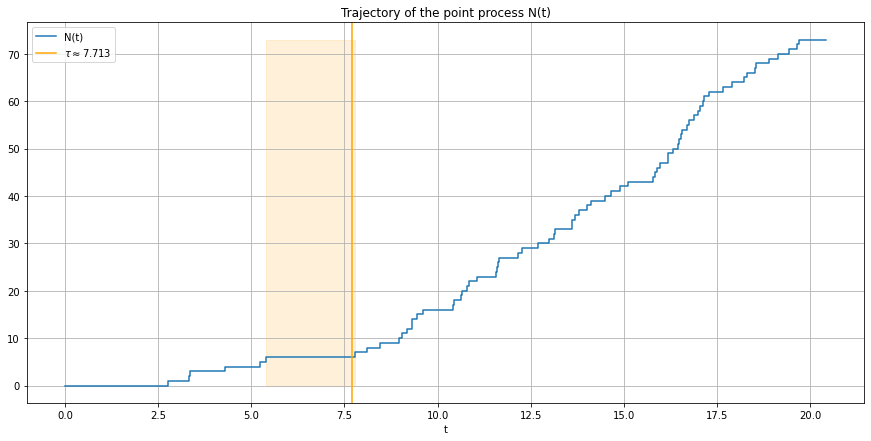

In [584]:
np.random.seed()

# Create the training sets
Training_Set0 = [Exponential(lambda0) for _ in range(1000)]
Training_Set1 = [Exponential(lambda1) for _ in range(1000)]

# Create the testing sets
Inter_arrival_times = [N[i+1]-N[i] for i in range(len(N) - 1)]

# Output the clustered data
L0, L1 = Bayesian_decision(Inter_arrival_times, Training_Set0, Training_Set1)
start, end = N[len(L0)-1], N[len(L0)]

# Plot the results
plt.figure(figsize = (15,7))
plt.step(N, pointprocess, label = 'N(t)')
plt.title("Trajectory of the point process N(t)")
if tau <= T :
    plt.axvline(x=tau, color = 'orange', label = r'$\tau \approx $' + str(tau)[:5])

#fig, ax = plt.subplots()
plt.fill_betweenx(pointprocess ,start, end, color = 'orange' ,alpha=0.15)
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()

### Comments : 

We can see that the Bayesian Method allow us to have an interval in which $\tau$ is. 

However, on this precise instance, we notice that the interval is rather big, because $\lambda_0$ is rather small compared to $T$, so we are not able to have a very precise approximation of $\tau$ in this case. 

For bigger values of $\lambda_0$, the interval would get smaller and would allow us to have a more refined approximation of $\tau$.